In [ ]:
%pip install numpy
%pip install pandas 
%pip install matplotlib 
%pip install seaborn  

In [1]:
# import main libiraies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("loan_prediction.csv") 
# Display basic information about the data
df.head()
# dim of dataframe 
df.shape
# statistics of dataset, quick overview of numerical features.
df.describe()
# Check for missing values in every column
df.isnull().sum()
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)
# conversion obj to int
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])
display(df)

# Display updated data types
df.dtypes

# Visualize class distribution of the target variable => 
sns.countplot(x="Risk_Flag", data=df)

# Save the preprocessed DataFrame
df.to_csv("preprocessed_data.csv", index=False)

# Set up target variable and features
y = df["Risk_Flag"].values # tareget output
X = df.drop(labels=["Risk_Flag", "Id"], axis=1) # input features

# Scale features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:] = sc.fit_transform(X[:])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Initialize the decision tree classifier
model = DecisionTreeClassifier()

# Fit the model using training data
model.fit(X_train, y_train)

# Predict classes on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold of 0.5
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)
display(y_pred_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy * 100:.3f}%")

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Display precision, recall, and F1-score
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize the random forest regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model using training data
model2.fit(X_train, y_train)

# Predict on the test set
y_pred2 = model2.predict(X_test)

# Convert regression predictions to binary classes based on a threshold (e.g., 0.5)
threshold = 0.5
y_pred_binary2 = np.where(y_pred2 > threshold, 1, 0)
display(y_pred_binary2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse:.3f}")

# Calculate Accuracy
accuracy2 = accuracy_score(y_test, y_pred_binary2)
print(f"Accuracy: {accuracy2 * 100:.3f}%")


# Calculate and display the 
conf_matrix2 = confusion_matrix(y_test, y_pred_binary2)
print("Confusion Matrix:")
# print(conf_matrix2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1-score
precision2 = precision_score(y_test, y_pred_binary2)
recall2 = recall_score(y_test, y_pred_binary2)
f1_score2 = f1_score(y_test, y_pred_binary2)

# Display confusion matrix, Precision, Recall, and F1-score
print(f"Precision: {precision2:.3f}")
print(f"Recall: {recall2:.3f}")
print(f"F1 Score: {f1_score2:.3f}")


# 

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the deep learning model
model = Sequential(name="FeedforwardNeuralNetwork")

# input layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# The purpose of the hidden layers is to learn complex patterns and representations from the input data
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))
#               update weights minmizing lossFunc
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred_prob2 = model.predict(X_test)
y_pred = (y_pred_prob2 > 0.5).astype(int)  # Threshold at 0.5 for binary classification

conf_matrix2 = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


precision_1 = accuracy_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print(f'\nPrecision: {precision_1}')
print(f'Recall: {recall_1}')
print(f'F1 Score: {f1_1}')


accuracy_1 = accuracy_score(y_test, y_pred)
# print(f'\nAccuracy: {accuracy}')
print(f"\nAccuracy: {accuracy_1 * 100:.3f}%")

# 


# Build the deep learning model
model2 = Sequential(name="DeepFeedforwardNeuralNetwork")

# Input layer
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Additional hidden layers to learn complex patterns
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))

# Output layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and MSE loss
model2.compile(optimizer="RMSprop", loss='mean_squared_error', metrics=['accuracy'])

# Embark on training the model.                       evaluate the model's performance after each epoch.
model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred_prob2 = model2.predict(X_test)
y_pred2 = (y_pred_prob2 > 0.5).astype(int)  # Threshold at 0.5 for binary classification

conf_matrix2 = confusion_matrix(y_test, y_pred2)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

precision_2 = accuracy_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)

print(f'\nPrecision: {precision_2}')
print(f'Recall: {recall_2}')
print(f'F1 Score: {f1_2}')

accuracy_2 = accuracy_score(y_test, y_pred2)
print(f"\nAccuracy: {accuracy_2 * 100:.3f}%")



In [2]:
# Load the data
df = pd.read_csv("loan_prediction.csv") 

In [3]:
# Display basic information about the data
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# dim of dataframe 
df.shape

(252000, 13)

In [5]:
# statistics of dataset, quick overview of numerical features.
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
# Check for missing values in every column
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
print(df.dtypes)

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object


# Data Preprocessing

note
<!-- 
  LabelEncoder : is used for categorical variables, converting them into numerical format.
StandardScaler : is used for numerical features, standardizing them for better model performance.
 -->

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

# conversion obj to int
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

display(df)

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,251997,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,251998,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,251999,6507128,45,0,1,2,0,27,233,18,0,10,0


In [9]:
# Display updated data types
df.dtypes

Id                   int64
Income               int64
Age                  int64
Experience           int64
Married/Single       int64
House_Ownership      int64
Car_Ownership        int64
Profession           int64
CITY                 int64
STATE                int64
CURRENT_JOB_YRS      int64
CURRENT_HOUSE_YRS    int64
Risk_Flag            int64
dtype: object

<Axes: xlabel='Risk_Flag', ylabel='count'>

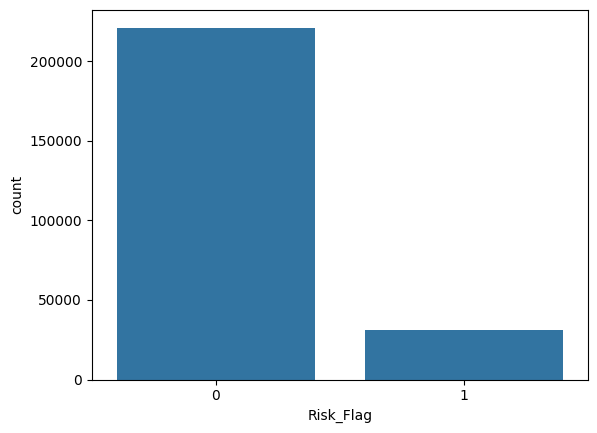

In [10]:
# Visualize class distribution of the target variable => 
sns.countplot(x="Risk_Flag", data=df)

In [11]:
# Save the preprocessed DataFrame
df.to_csv("preprocessed_data.csv", index=False)

In [12]:
# Set up target variable and features
y = df["Risk_Flag"].values # tareget output
X = df.drop(labels=["Risk_Flag", "Id"], axis=1) # input features
X

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,251,13,3,13
1,7574516,40,10,1,2,0,43,227,14,9,13
2,3991815,66,4,0,2,0,47,8,12,4,10
3,6256451,41,2,1,2,1,43,54,17,2,12
4,5768871,47,11,1,2,0,11,296,22,3,14
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11
251996,2843572,26,10,1,2,0,3,251,13,6,11
251997,4522448,46,7,1,2,0,17,144,14,7,12
251998,6507128,45,0,1,2,0,27,233,18,0,10


# Feature Scalling

In [14]:
# Scale features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:] = sc.fit_transform(X[:])

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.283145,-1.579604,-1.180232,0.337200,0.276304,-0.657129,0.524374,1.007167,-0.086313,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,0.337200,0.276304,-0.657129,1.203330,0.746867,0.020384,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,-2.965599,0.276304,-0.657129,1.474912,-1.628364,-0.193011,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,0.337200,0.276304,1.521772,1.203330,-1.129457,0.340477,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,0.337200,0.276304,-0.657129,-0.969327,1.495228,0.873965,-0.914131,1.431135
...,...,...,...,...,...,...,...,...,...,...,...
251995,1.097092,-0.407533,0.485719,0.337200,0.276304,-0.657129,1.339121,0.041890,1.514151,-0.091547,-0.713202
251996,-0.748199,-1.403793,-0.014067,0.337200,0.276304,-0.657129,-1.512492,1.007167,-0.086313,-0.091547,-0.713202
251997,-0.164913,-0.231723,-0.513852,0.337200,0.276304,-0.657129,-0.561954,-0.153334,0.020384,0.182647,0.001577
251998,0.524618,-0.290326,-1.680018,0.337200,0.276304,-0.657129,0.117001,0.811942,0.447175,-1.736714,-1.427981


# Train-Test Split:

In [16]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 1- DecisionTreeClassifier Model

array([0, 0, 0, ..., 1, 0, 0])

Accuracy: 87.994%
Confusion Matrix:
[[40780  3367]
 [ 2684  3569]]


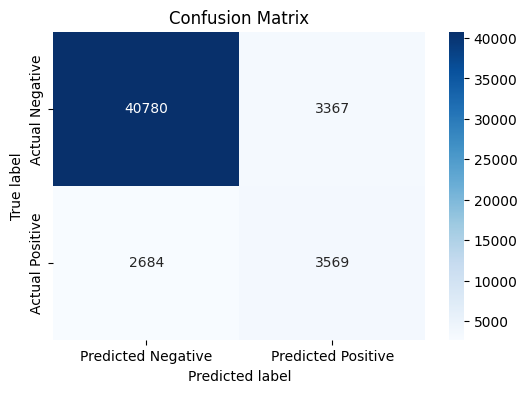

Precision: 0.515
Recall: 0.571
F1 Score: 0.541


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Initialize the decision tree classifier
model = DecisionTreeClassifier()

# Fit the model using training data
model.fit(X_train, y_train)

# Predict classes on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold of 0.5
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)
display(y_pred_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy * 100:.3f}%")

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Display precision, recall, and F1-score
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize the random forest regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model using training data
model2.fit(X_train, y_train)

# Predict on the test set
y_pred2 = model2.predict(X_test)

# Convert regression predictions to binary classes based on a threshold (e.g., 0.5)
threshold = 0.5
y_pred_binary2 = np.where(y_pred2 > threshold, 1, 0)
display(y_pred_binary2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse:.3f}")

# Calculate Accuracy
accuracy2 = accuracy_score(y_test, y_pred_binary2)
print(f"Accuracy: {accuracy2 * 100:.3f}%")


# Calculate and display the 
conf_matrix2 = confusion_matrix(y_test, y_pred_binary2)
print("Confusion Matrix:")
# print(conf_matrix2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1-score
precision2 = precision_score(y_test, y_pred_binary2)
recall2 = recall_score(y_test, y_pred_binary2)
f1_score2 = f1_score(y_test, y_pred_binary2)

# Display confusion matrix, Precision, Recall, and F1-score
print(f"Precision: {precision2:.3f}")
print(f"Recall: {recall2:.3f}")
print(f"F1 Score: {f1_score2:.3f}")

....

<!-- 
Mean Squared Error x2 :Purpose ==> Measures the average squared difference between actual and predicted values.
Mean Absolute Error |x|:Purpose ==> Measures the average absolute difference between actual and predicted values. MAE is less sensitive to outliers than MSE
 -->

# 2- RandomForestRegressor Model

array([0, 0, 0, ..., 1, 0, 0])

Mean Squared Error: 0.065
Accuracy: 89.825%
Confusion Matrix:


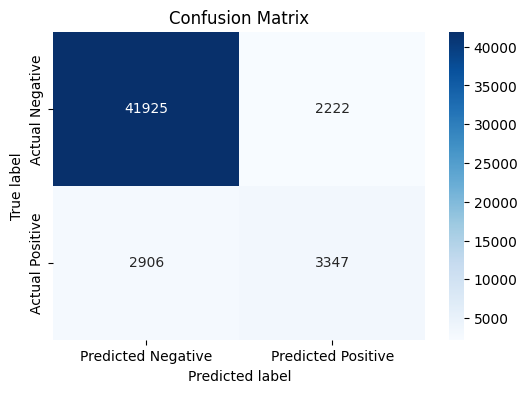

Precision: 0.601
Recall: 0.535
F1 Score: 0.566


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize the random forest regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model using training data
model2.fit(X_train, y_train)

# Predict on the test set
y_pred2 = model2.predict(X_test)

# Convert regression predictions to binary classes based on a threshold (e.g., 0.5)
threshold = 0.5
y_pred_binary2 = np.where(y_pred2 > threshold, 1, 0)
display(y_pred_binary2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse:.3f}")

# Calculate Accuracy
accuracy2 = accuracy_score(y_test, y_pred_binary2)
print(f"Accuracy: {accuracy2 * 100:.3f}%")


# Calculate and display the 
conf_matrix2 = confusion_matrix(y_test, y_pred_binary2)
print("Confusion Matrix:")
# print(conf_matrix2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1-score
precision2 = precision_score(y_test, y_pred_binary2)
recall2 = recall_score(y_test, y_pred_binary2)
f1_score2 = f1_score(y_test, y_pred_binary2)

# Display confusion matrix, Precision, Recall, and F1-score
print(f"Precision: {precision2:.3f}")
print(f"Recall: {recall2:.3f}")
print(f"F1 Score: {f1_score2:.3f}")

In [27]:
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Epoch 1/5
6300/6300 [==============================] - 5s 798us/step - loss: 0.3700 - accuracy: 0.8767 - val_loss: 0.3670 - val_accuracy: 0.8759
Epoch 2/5
6300/6300 [==============================] - 5s 785us/step - loss: 0.3579 - accuracy: 0.8773 - val_loss: 0.3581 - val_accuracy: 0.8759
Epoch 3/5
6300/6300 [==============================] - 5s 797us/step - loss: 0.3488 - accuracy: 0.8774 - val_loss: 0.3495 - val_accuracy: 0.8759
Epoch 4/5
6300/6300 [==============================] - 5s 753us/step - loss: 0.3402 - accuracy: 0.8777 - val_loss: 0.3390 - val_accuracy: 0.8762
Epoch 5/5
1575/1575 [==============================] - 1s 408us/step


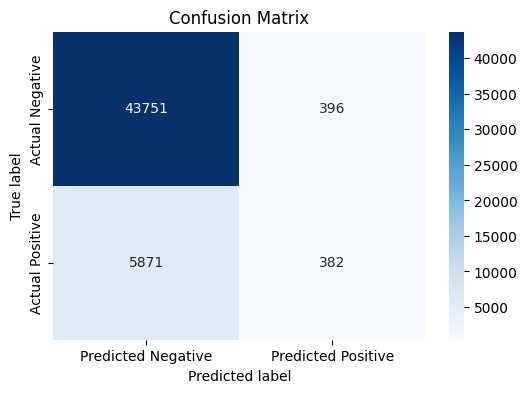


Precision: 0.8756547619047619
Recall: 0.06109067647529186
F1 Score: 0.10866164130280188

Accuracy: 87.565%


In [25]:
# Build the deep learning model
model = Sequential(name="FeedforwardNeuralNetwork")

# input layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# The purpose of the hidden layers is to learn complex patterns and representations from the input data
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))
#               update weights minmizing lossFunc
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred_prob2 = model.predict(X_test)
y_pred = (y_pred_prob2 > 0.5).astype(int)  # Threshold at 0.5 for binary classification

conf_matrix2 = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


precision_1 = accuracy_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print(f'\nPrecision: {precision_1}')
print(f'Recall: {recall_1}')
print(f'F1 Score: {f1_1}')


accuracy_1 = accuracy_score(y_test, y_pred)
# print(f'\nAccuracy: {accuracy}')
print(f"\nAccuracy: {accuracy_1 * 100:.3f}%")

Epoch 1/5
6300/6300 [==============================] - 5s 798us/step - loss: 0.1077 - accuracy: 0.8773 - val_loss: 0.1079 - val_accuracy: 0.8759
Epoch 2/5
6300/6300 [==============================] - 5s 843us/step - loss: 0.1061 - accuracy: 0.8773 - val_loss: 0.1063 - val_accuracy: 0.8759
Epoch 3/5
6300/6300 [==============================] - 5s 763us/step - loss: 0.1041 - accuracy: 0.8773 - val_loss: 0.1049 - val_accuracy: 0.8759
Epoch 4/5
6300/6300 [==============================] - 5s 763us/step - loss: 0.1021 - accuracy: 0.8776 - val_loss: 0.1012 - val_accuracy: 0.8776
Epoch 5/5
1575/1575 [==============================] - 1s 417us/step


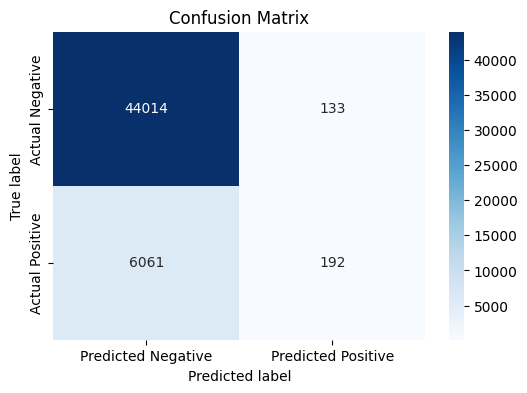


Precision: 0.8771031746031746
Recall: 0.030705261474492245
F1 Score: 0.05837640620249315

Accuracy: 87.710%


In [ ]:
# Build the deep learning model
model2 = Sequential(name="DeepFeedforwardNeuralNetwork")

# Input layer
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Additional hidden layers to learn complex patterns
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))

# Output layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and MSE loss
model2.compile(optimizer="RMSprop", loss='mean_squared_error', metrics=['accuracy'])

# Embark on training the model.                       evaluate the model's performance after each epoch.
model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred_prob2 = model2.predict(X_test)
y_pred2 = (y_pred_prob2 > 0.5).astype(int)  # Threshold at 0.5 for binary classification

conf_matrix2 = confusion_matrix(y_test, y_pred2)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

precision_2 = accuracy_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)

print(f'\nPrecision: {precision_2}')
print(f'Recall: {recall_2}')
print(f'F1 Score: {f1_2}')

accuracy_2 = accuracy_score(y_test, y_pred2)
print(f"\nAccuracy: {accuracy_2 * 100:.3f}%")
